<a href="https://colab.research.google.com/github/gabrielcn/Bike_Sharing/blob/main/cyclistic_bike_share_new_york.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Compartilhamento de bicicletas em NY - 2016 (Citibike)***


In [ ]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
from datetime import datetime #operações para analisar datas

In [ ]:
 df_ny = pd.read_csv("NYC-2016-Summary.csv") #Atribui a uma variável 

In [ ]:
df_ny

,duration,month,hour,day_of_week,user_type
0,13.983333,1,0,Friday,Customer
1,11.433333,1,0,Friday,Subscriber
2,5.250000,1,0,Friday,Subscriber
3,12.316667,1,0,Friday,Subscriber
4,20.883333,1,0,Friday,Customer
...,...,...,...,...,...
276793,4.916667,12,22,Saturday,Customer
276794,4.616667,12,22,Saturday,Subscriber
276795,10.016667,12,23,Saturday,Subscriber
276796,35.033333,12,23,Saturday,Subscriber


In [ ]:
df_ny.shape #Formato da tabela

(276798, 5)

In [ ]:
df_ny.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_ny.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,13.983333,1,0,Friday,Customer
1,11.433333,1,0,Friday,Subscriber
2,5.250000,1,0,Friday,Subscriber
3,12.316667,1,0,Friday,Subscriber
4,20.883333,1,0,Friday,Customer


In [ ]:
df_ny['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
df_ny['mes'].value_counts() #Quantas vezes em cada mes

9     32699
10    31519
8     31104
6     29242
7     27522
5     24455
11    24148
4     20160
3     18413
12    16186
2     11170
1     10180
Name: mes, dtype: int64

In [ ]:
df_ny['dia_semana'].value_counts() #Quantas vezes em cada dia

Wednesday    44629
Thursday     44330
Tuesday      42405
Friday       41389
Monday       39340
Saturday     33353
Sunday       31352
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [ ]:
qtd_viagem_por_dia_ny = df_ny['dia_semana'].value_counts() #NY

In [ ]:
qtd_viagem_por_dia_ny

Wednesday    44629
Thursday     44330
Tuesday      42405
Friday       41389
Monday       39340
Saturday     33353
Sunday       31352
Name: dia_semana, dtype: int64

In [ ]:
qtd_viagem_por_dia_ny.to_frame()

,dia_semana
Wednesday,44629
Thursday,44330
Tuesday,42405
Friday,41389
Monday,39340
Saturday,33353
Sunday,31352


In [ ]:
df_qtd_viagem_por_dia_ny = qtd_viagem_por_dia_ny.to_frame().reset_index()

In [ ]:
df_qtd_viagem_por_dia_ny #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Wednesday,44629
1,Thursday,44330
2,Tuesday,42405
3,Friday,41389
4,Monday,39340
5,Saturday,33353
6,Sunday,31352


In [ ]:
df_qtd_viagem_por_dia_ny.columns = ["dias", "total"]
df_qtd_viagem_por_dia_ny

,dias,total
0,Wednesday,44629
1,Thursday,44330
2,Tuesday,42405
3,Friday,41389
4,Monday,39340
5,Saturday,33353
6,Sunday,31352


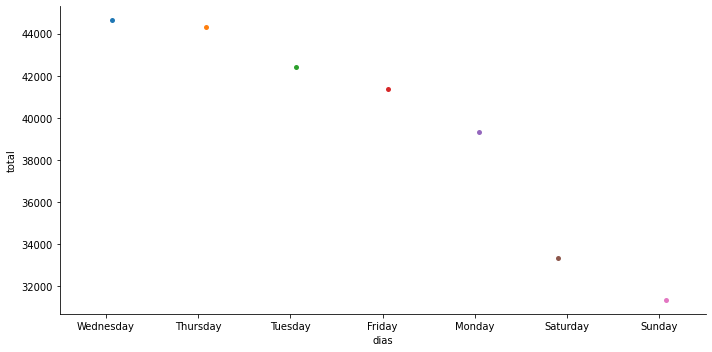

In [ ]:
sns.catplot(x="dias", y="total", data = df_qtd_viagem_por_dia_ny, aspect = 2)

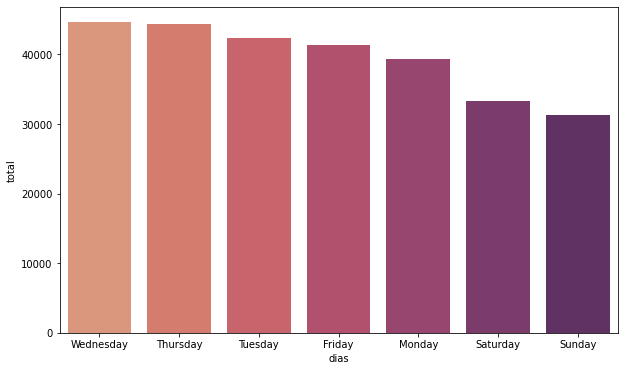

In [ ]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_ny, palette = "flare") #pallete, atributo que permite escolher um palete de cor, no caso é flare

In [ ]:
df_ny.loc[df_ny.tipo_usuario=='Subscriber'].value_counts().sum()

245896

In [ ]:
df_ny.loc[df_ny.tipo_usuario=='Subscriber'].value_counts().sum()

245896

In [ ]:
df_ny.loc[df_ny.tipo_usuario=='Customer'].value_counts().sum() #Localiza a coluna tipo_usuario e conta todos que são "Customer" e a função sum, soma tudo.
#Obs: Não sabemos se tem usuário repetido na tabela, vamos usar a abordagem de frequencia para saber se usuários cadastrados são mais frequentes que usuários customizados

30185

In [ ]:
customer_ny = df_ny.loc[df_ny.tipo_usuario=='Customer'].value_counts().sum()

Frequencia dos tipos de usuários em relação ao horário

Quartis: Os quartis dividem os dados em quatro partes. Ordenando os dados cada quartil vai possuir 25% das observações. Ou seja, os primeiros 25% das observação estarão até o corte do 1º quartil, os próximos 25% até o corte do 2º quartil, etc.

Limites: O limite inferior é calculado sendo, geralmente, 1,5 vezes o corte do 1º quartil e o limite superior sendo 1,5 vezes o corte do 3º quartil.
O corte do segundo quartil é igual a mediana.

Outliers são observações atípicas, muito afastadas da maioria dos dados. Num boxplot esses valores ficam abaixo do limite inferior ou acima do limite superior.

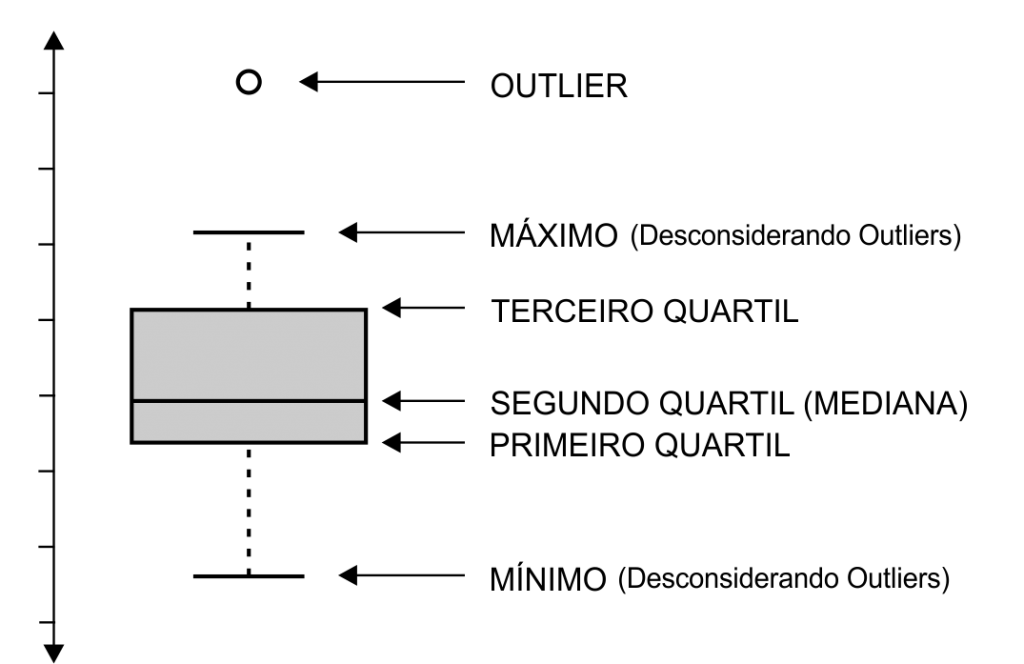

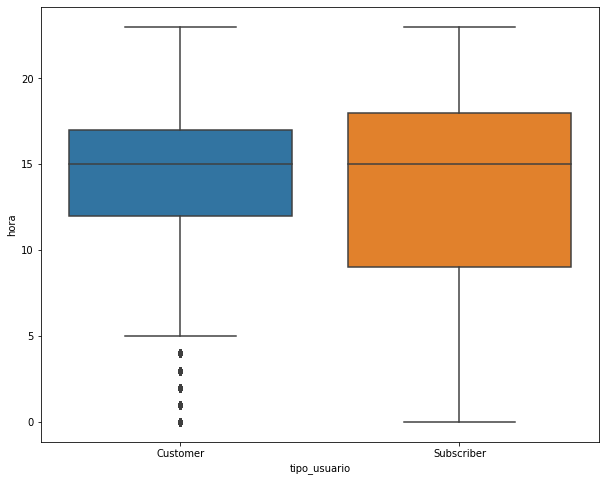

In [ ]:
plt.figure(figsize=(10,8)) #Configura o tamanho da figura (10 para direita e 8 para baixo)
sns.boxplot(x="tipo_usuario", y="hora", data = df_ny) 
# Grafico mostra que mostra a frequencia dos tipos de usuários em relação ao horário e o desvio padrão (standart deviation)

In [ ]:
df_ny.groupby("tipo_usuario").median()["hora"] # Mediana

tipo_usuario
Customer      15.0
Subscriber    15.0
Name: hora, dtype: float64

Explorando de viagens por hora e por mês


In [ ]:
#Substitui valores da coluna por condição em pandas
df_ny.loc[df_ny.mes==1, "mes"]='jan'
df_ny.loc[df_ny.mes==2, "mes"]='fev'
df_ny.loc[df_ny.mes==3, "mes"]='mar'
df_ny.loc[df_ny.mes==4, "mes"]='abr'
df_ny.loc[df_ny.mes==5, "mes"]='mai'
df_ny.loc[df_ny.mes==6, "mes"]='jun'
df_ny.loc[df_ny.mes==7, "mes"]='jul'
df_ny.loc[df_ny.mes==8, "mes"]='ago'
df_ny.loc[df_ny.mes==9, "mes"]='set'
df_ny.loc[df_ny.mes==10, "mes"]='out'
df_ny.loc[df_ny.mes==11, "mes"]='nov'
df_ny.loc[df_ny.mes==12, "mes"]='dez'

In [ ]:
df_ny['mes'].value_counts() #Quantidade de viagens por mes em New York

set    32699
out    31519
ago    31104
jun    29242
jul    27522
mai    24455
nov    24148
abr    20160
mar    18413
dez    16186
fev    11170
jan    10180
Name: mes, dtype: int64

In [ ]:
qtd_viagem_mes_ny = df_ny['mes'].value_counts() 

In [ ]:
qtd_viagem_mes_ny = qtd_viagem_mes_ny.to_frame().reset_index()

In [ ]:
qtd_viagem_mes_ny

,index,mes
0,set,32699
1,out,31519
2,ago,31104
3,jun,29242
4,jul,27522
5,mai,24455
6,nov,24148
7,abr,20160
8,mar,18413
9,dez,16186


In [ ]:
qtd_viagem_mes_ny.columns = ["mes", "total"]
qtd_viagem_mes_ny

,mes,total
0,set,32699
1,out,31519
2,ago,31104
3,jun,29242
4,jul,27522
5,mai,24455
6,nov,24148
7,abr,20160
8,mar,18413
9,dez,16186


Análise geral por mes (todos os usuários, customer e subscriber)

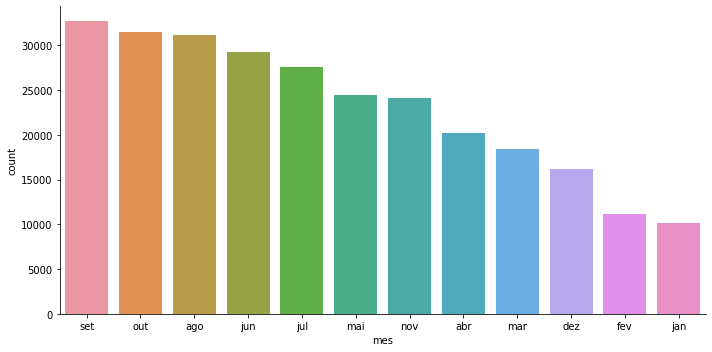

In [ ]:
sns.catplot(x="mes", kind="count", data = df_ny, aspect = 2, order = df_ny['mes'].value_counts().index) 
# usando alto nível, o sns.catplot vai plotar categoricamente as categorias de "mes", de maneira que conte (kind="count") quantas vezes aparece, e o data = df_chicago (está usando o DF df_chicago que importamos)
# aspect configura o tamanho da figura, colocando o 2 para trazer o dobro (retangulo) do quadrado.
# E o order define a ordem como é apresentado o gráfico, no caso é a ordem da série df_chicago['mes'].value_counts().index e o ".index" é o indice que está definida a ordem. index da série.

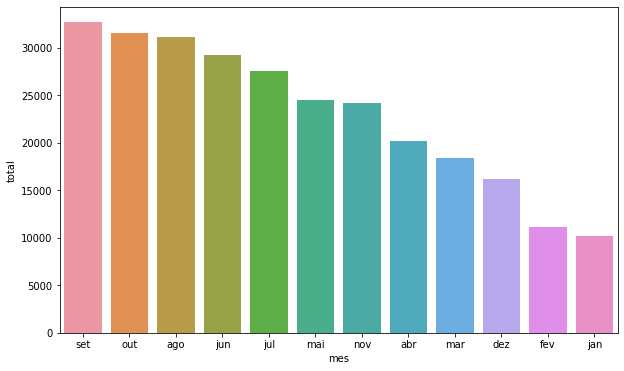

In [ ]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="mes", y="total", data = qtd_viagem_mes_ny)

Explorando por horário (todos os usuários)

In [ ]:
df_ny['hora'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
df_ny['hora'].value_counts() #Quantidade de viagens no ano de 2016 por horário

17    27199
18    26102
8     22550
16    19871
19    17679
9     17649
15    16839
14    16164
13    15696
12    14694
7     13036
11    12871
20    12190
10    12150
21     8493
22     6205
6      6001
23     4301
0      2441
5      1570
1      1373
2       717
3       504
4       503
Name: hora, dtype: int64

In [ ]:
qtd_viagem_hora_ny = df_ny['hora'].value_counts()

In [ ]:
qtd_viagem_hora_ny

17    27199
18    26102
8     22550
16    19871
19    17679
9     17649
15    16839
14    16164
13    15696
12    14694
7     13036
11    12871
20    12190
10    12150
21     8493
22     6205
6      6001
23     4301
0      2441
5      1570
1      1373
2       717
3       504
4       503
Name: hora, dtype: int64

In [ ]:
qtd_viagem_hora_ny.to_frame().reset_index()

,index,hora
0,17,27199
1,18,26102
2,8,22550
3,16,19871
4,19,17679
5,9,17649
6,15,16839
7,14,16164
8,13,15696
9,12,14694


In [ ]:
qtd_viagem_hora_ny = qtd_viagem_hora_ny.to_frame().reset_index()

In [ ]:
qtd_viagem_hora_ny

,index,hora
0,17,27199
1,18,26102
2,8,22550
3,16,19871
4,19,17679
5,9,17649
6,15,16839
7,14,16164
8,13,15696
9,12,14694


In [ ]:
qtd_viagem_hora_ny.columns = ["hora", "total"]
qtd_viagem_hora_ny

,hora,total
0,17,27199
1,18,26102
2,8,22550
3,16,19871
4,19,17679
5,9,17649
6,15,16839
7,14,16164
8,13,15696
9,12,14694


**Analise por hora de todos os usuários**

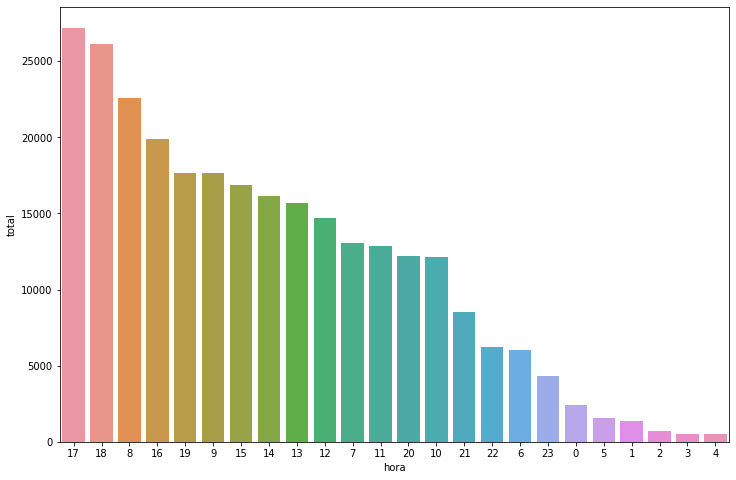

In [ ]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (12 para direita e 8 para baixo)
sns.barplot(x="hora", y="total", data = qtd_viagem_hora_ny, order = df_ny['hora'].value_counts().index)
# Quantidade total de viagens de todos os usuários por horário

**Quantidade ou frequencia de usuários por categoria (Subscriber e Customer)**

In [65]:
subscriber_ny = df_ny.loc[df_ny.tipo_usuario=='Subscriber'].value_counts().sum()

In [64]:
subscriber_ny

245896

In [60]:
customer_ny = df_ny.loc[df_ny.tipo_usuario=='Customer'].value_counts().sum()

In [61]:
customer_ny

30185

In [ ]:
df_usuarios_ny = {
    'tipo' : ['subscriber', 'customer'],
    'total' : [subscriber_ny, customer_ny]
    # {} dicionário do python
}

df_usuarios_ny

{'tipo': ['subscriber', 'customer'], 'total': [245896, 30185]}

In [ ]:
pd.DataFrame(df_usuarios_ny) #Cria ou transforma em dataframe em cima de 'df_usuarios_chicago' que acabei de criar como dicionario

,tipo,total
0,subscriber,245896
1,customer,30185


In [ ]:
df_usuarios_ny = pd.DataFrame(df_usuarios_ny) #É um costume sobrescrever a variável, mas não é necessário
df_usuarios_ny

,tipo,total
0,subscriber,245896
1,customer,30185


**Analise de frequencia ou quantidades de usuarios**

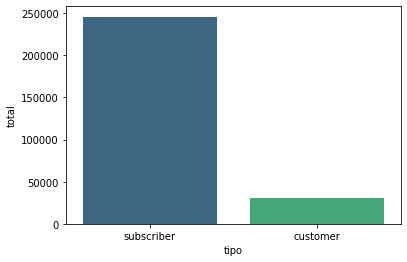

In [ ]:
sns.barplot(x="tipo", y="total", data = df_usuarios_ny, palette = "viridis") #Gráfico de barras com seaborn, definindo o "tipo" no eixo x e o "total" no eixo y, extraido do DF df_usuarios_chicago


Duração média de viagem por tipo de usuário

In [ ]:
df_ny.groupby("tipo_usuario").mean()["duracao"] # Duração média por tipo de usuário

tipo_usuario
Customer      32.982004
Subscriber    13.680791
Name: duracao, dtype: float64

Mediana por tipo de usuário

In [ ]:
df_ny.groupby("tipo_usuario").median()["duracao"] # Mediana

tipo_usuario
Customer      21.233333
Subscriber     9.716667
Name: duracao, dtype: float64

Explorando a frequencia (mes e hora) de usuários customizados e usuários cadastrados

In [ ]:
total_tipo_usuarios_ny = df_ny.tipo_usuario.value_counts()

In [ ]:
total_tipo_usuarios_ny

Subscriber    245896
Customer       30185
Name: tipo_usuario, dtype: int64

In [ ]:
df_ny2 = df_ny.copy() #Cria uma cópia do df_ny_copy

In [ ]:
df_ny2

,duracao,mes,hora,dia_semana,tipo_usuario
0,13.983333,jan,0,Friday,Customer
1,11.433333,jan,0,Friday,Subscriber
2,5.250000,jan,0,Friday,Subscriber
3,12.316667,jan,0,Friday,Subscriber
4,20.883333,jan,0,Friday,Customer
...,...,...,...,...,...
276793,4.916667,dez,22,Saturday,Customer
276794,4.616667,dez,22,Saturday,Subscriber
276795,10.016667,dez,23,Saturday,Subscriber
276796,35.033333,dez,23,Saturday,Subscriber


Obs: O Pandas permite filtrar um DataFrame pelos dados de sua coluna. Por exemplo, queremos pegar do data frame de chicago a coluna que define o tipe de usuario e com base nisso, queremos as linhas que são iguais a "Subscriber"

**Criando um DF para usuários Subscriber e outro para Customer**

**Explorando de usuários Subscriber por mes**

In [ ]:
filtro_sub_ny = df_ny2['tipo_usuario'] == "Subscriber"

In [ ]:
subscriber_ny= df_ny2[filtro_sub_ny]

In [ ]:
subscriber_ny

,duracao,mes,hora,dia_semana,tipo_usuario
1,11.433333,jan,0,Friday,Subscriber
2,5.250000,jan,0,Friday,Subscriber
3,12.316667,jan,0,Friday,Subscriber
5,8.750000,jan,0,Friday,Subscriber
6,10.983333,jan,0,Friday,Subscriber
...,...,...,...,...,...
276792,9.350000,dez,22,Saturday,Subscriber
276794,4.616667,dez,22,Saturday,Subscriber
276795,10.016667,dez,23,Saturday,Subscriber
276796,35.033333,dez,23,Saturday,Subscriber
